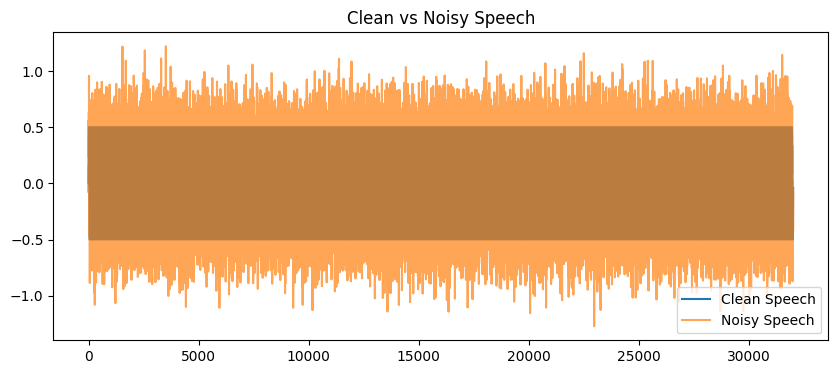

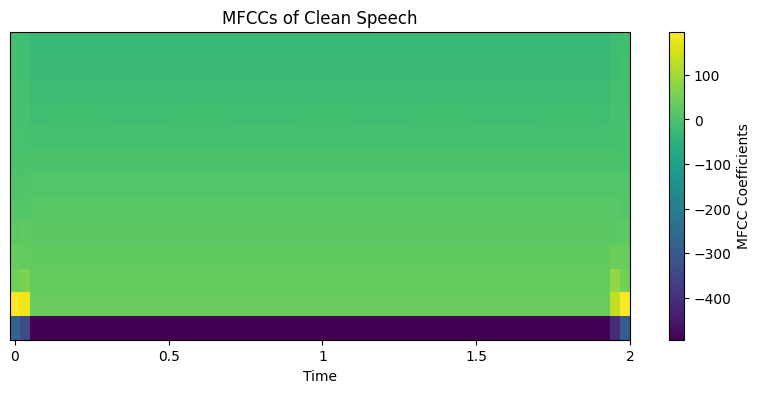

Training Features: (100, 13, 1), Training Labels: (100, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_5 (GRU)                          │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.0215 - loss: 0.7518 - val_accuracy: 0.2308 - val_loss: 0.7028 - learning_rate: 0.0010
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4263 - loss: 0.6910 - val_accuracy: 0.8846 - val_loss: 0.6494 - learning_rate: 0.0010
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9630 - loss: 0.6360 - val_accuracy: 0.9231 - val_loss: 0.6004 - learning_rate: 0.0010
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9661 - loss: 0.5830 - val_accuracy: 0.9615 - val_loss: 0.5525 - learning_rate: 0.0010
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9630 - loss: 0.5330 - val_accuracy: 0.9615 - val_loss: 0.5049 - learning_rate: 0.0010
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9599 - loss: 0.4881 - val_accuracy: 0.9615 - val_loss: 0.4566 - learning_rate: 0.0010
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9786 - loss: 0.4281 - val_accuracy: 0.9615

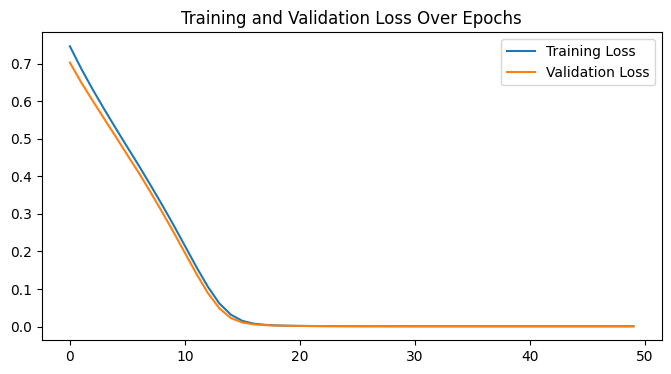

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 7.6344e-04
Test Accuracy: 1.00
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step


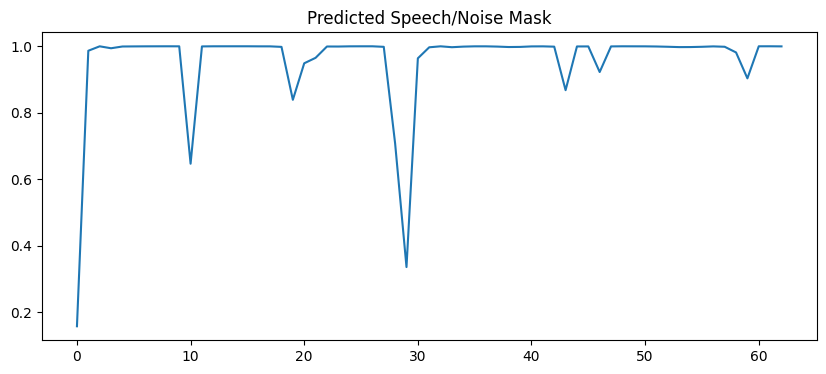

Denoised audio saved as 'denoised_output.wav'
Signal-to-Noise Ratio (SNR) after Noise Suppression: -1.42 dB


In [7]:
# Import required libraries
# -------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import soundfile as sf

# STEP 1: Generate Sample Audio Data
# -----------------------------------
# Generate a sine wave as the clean speech signal
sr = 16000  # Sampling rate (16 kHz)
duration = 2  # Duration in seconds
t = np.linspace(0, duration, int(sr * duration), endpoint=False)
clean_speech = 0.5 * np.sin(2 * np.pi * 220 * t)  # Clean sine wave at 220 Hz

# Generate random white noise
noise = 0.2 * np.random.normal(0, 1, len(clean_speech))  # White noise

# Combine clean speech with noise to create a noisy signal
noisy_speech = clean_speech + noise

# Plot clean and noisy audio signals for visualization
plt.figure(figsize=(10, 4))
plt.plot(clean_speech, label="Clean Speech")
plt.plot(noisy_speech, label="Noisy Speech", alpha=0.7)
plt.legend()
plt.title("Clean vs Noisy Speech")
plt.show()

# STEP 2: Extract MFCC Features
# -----------------------------------
def extract_mfcc(audio, sr, n_mfcc=13):
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return mfcc.T  # Transpose to make time steps as rows

# Extract MFCC features from clean and noisy signals
clean_features = extract_mfcc(clean_speech, sr)
noisy_features = extract_mfcc(noisy_speech, sr)

# Plot the MFCCs for clean speech
plt.figure(figsize=(10, 4))
librosa.display.specshow(clean_features.T, sr=sr, x_axis='time', cmap='viridis')
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCCs of Clean Speech")
plt.show()

# STEP 3: Prepare Dataset for Training
# -----------------------------------
# Generate labels: 1 for clean speech, 0 for noisy speech
clean_labels = np.ones((clean_features.shape[0], 1))
noisy_labels = np.zeros((noisy_features.shape[0], 1))

# Combine features and labels
X = np.vstack([clean_features, noisy_features])  # Combine features
y = np.vstack([clean_labels, noisy_labels])  # Combine labels

# Shuffle and split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape to 3D: (samples, time_steps, features)
time_steps = X_train.shape[1]  # Number of MFCC time steps
X_train = X_train.reshape(X_train.shape[0], time_steps, 1)
X_test = X_test.reshape(X_test.shape[0], time_steps, 1)

print(f"Training Features: {X_train.shape}, Training Labels: {y_train.shape}")

# STEP 4: Define the RNN Model
# -----------------------------------
model = Sequential([
    GRU(64, return_sequences=False, input_shape=(time_steps, 1)),  # Outputs a single value
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# STEP 5: Train the RNN Model
# -----------------------------------
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=3)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,  # Number of epochs
    batch_size=32,  # Batch size
    callbacks=callbacks
)

# Plot training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training and Validation Loss Over Epochs")
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# STEP 6: Apply Noise Suppression
# -----------------------------------
# Predict the mask using the trained model
predictions = model.predict(noisy_features.reshape(noisy_features.shape[0], noisy_features.shape[1], 1))

# Apply the continuous mask to suppress noise
denoised_features = noisy_features * predictions

# Plot the predicted mask
plt.figure(figsize=(10, 4))
plt.plot(predictions, label="Predicted Mask")
plt.title("Predicted Speech/Noise Mask")
plt.show()

# STEP 7: Reconstruct the Signal
# -----------------------------------
def reconstruct_signal(mfcc_features, sr):
    # Reconstruct audio from MFCC
    audio = librosa.feature.inverse.mfcc_to_audio(mfcc_features.T)
    # Manually adjust the length to match the clean speech signal
    if len(audio) > len(clean_speech):
        audio = audio[:len(clean_speech)]  # Truncate
    else:
        audio = np.pad(audio, (0, len(clean_speech) - len(audio)), mode='constant')  # Pad
    return audio

# Reconstruct the denoised audio signal
denoised_audio = reconstruct_signal(denoised_features, sr)

# Save the denoised audio to a file
sf.write("denoised_output.wav", denoised_audio, sr)
print("Denoised audio saved as 'denoised_output.wav'")

# Evaluate Noise Suppression Quality
def compute_snr(clean_signal, denoised_signal):
    # Align lengths by truncating or padding
    min_len = min(len(clean_signal), len(denoised_signal))
    clean_signal = clean_signal[:min_len]
    denoised_signal = denoised_signal[:min_len]

    # Compute Signal-to-Noise Ratio (SNR)
    signal_power = np.mean(clean_signal**2)
    noise_power = np.mean((clean_signal - denoised_signal)**2)
    return 10 * np.log10(signal_power / noise_power)

# Compute SNR
snr = compute_snr(clean_speech, denoised_audio)
print(f"Signal-to-Noise Ratio (SNR) after Noise Suppression: {snr:.2f} dB")
